<a href="https://colab.research.google.com/github/Giovannasmoura/neural-network-series/blob/main/1%C2%BA_Teste_com_Perceptron_Multicamadas_DEU_CERTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Importanto pacotes para trabalhar com Perceptron 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
# Separação dos dados de teste e treino
from sklearn.model_selection import train_test_split
# Pacotes para averiguar a acuracia do treinamento
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# Manipulação dos dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tratamento de Base de Dados


In [24]:
from google.colab import files
uploaded=files.upload()
import io

Saving cardio.csv to cardio.csv


In [25]:
original_data = pd.read_csv("cardio.csv", sep=';')
data = original_data.iloc[:, 1:]

X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

# O "iloc" acessa cada posição da tabela, os ":" significa acessar todas as linha e "1:" remove a 1º coluna.

print(len(X))

70000


In [26]:
#Quando temos uma única tabela, temos que selecionar dentro dela os dados de treino e teste. Abaixo selecionamos "0.15", ou seja, 15% para dado de teste e o reste vai ser usado como dados de treino.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [28]:
sc = StandardScaler()
sc.fit(X_train)

X_train_scaled = sc.transform(X_train.values)
X_test_scaled = sc.transform(X_test.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


#Perceptron

In [29]:
ppn = Perceptron(max_iter=1000, eta0=0.1, random_state=0)
ppn.fit(X_train, y_train.values.ravel())

Perceptron(eta0=0.1)

In [30]:
y_pred = ppn.predict(X_test)

In [31]:
confusion_matrix(y_test, y_pred)

array([[2789, 2497],
       [1001, 4213]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


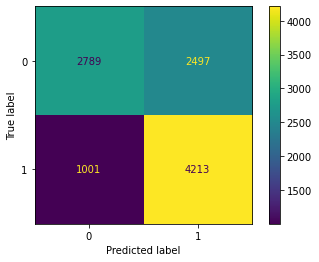

In [32]:
plot_confusion_matrix(ppn, X_test, y_test) 

In [33]:
accuracy_score(y_test, y_pred)

0.6668571428571428

# Perceptron Multicamada


In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [35]:
import random as python_random

SEED = 0

np.random.seed(SEED)
python_random.seed(SEED)
tf.random.set_seed(SEED)

In [36]:
ann = keras.Sequential()
ann.add(layers.Dense(6, activation='relu'))
ann.add(layers.Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#mencionar que o adam é um stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

In [37]:
history = ann.fit(X_train, y_train, batch_size=128, epochs=100)


Epoch 1/100
465/465 [==============================] - 2s 2ms/step - loss: 45.5871 - accuracy: 0.5012
Epoch 2/100
465/465 [==============================] - 1s 2ms/step - loss: 0.7419 - accuracy: 0.5069
Epoch 3/100
465/465 [==============================] - 1s 2ms/step - loss: 0.7590 - accuracy: 0.5061
Epoch 4/100
465/465 [==============================] - 1s 2ms/step - loss: 0.7550 - accuracy: 0.5063
Epoch 5/100
465/465 [==============================] - 1s 2ms/step - loss: 0.7477 - accuracy: 0.5072
Epoch 6/100
465/465 [==============================] - 1s 2ms/step - loss: 0.7445 - accuracy: 0.5063
Epoch 7/100
465/465 [==============================] - 1s 2ms/step - loss: 0.7479 - accuracy: 0.5064
Epoch 8/100
465/465 [==============================] - 1s 2ms/step - loss: 0.7359 - accuracy: 0.5137
Epoch 9/100
465/465 [==============================] - 1s 2ms/step - loss: 0.7417 - accuracy: 0.5151
Epoch 10/100
465/465 [==============================] - 1s 2ms/step - loss: 0.7325 - accur

In [38]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [39]:
confusion_matrix(y_test, y_pred)

array([[3993, 1293],
       [1725, 3489]])

In [40]:
accuracy_score(y_test, y_pred)

0.7125714285714285